In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
# Change font size to 12
plt.rcParams.update({'font.size': 12})
# Change font to Arial
plt.rcParams.update({'font.family': 'Arial'})

from ode_model import * 

In [2]:
p = default_parameters()

N_CAPS = p['Vcap']/p['kdcap']
# Initial conditions
initial_conditions = np.zeros(23)
initial_conditions[0] = N_CAPS # Number of CAPS 
initial_conditions[1] = 1 # Number of Virus

# Time points
t = np.linspace(0, 12, 1000)

# Solve ODE
sol = odeint(model, initial_conditions, t, args=(p,), rtol=1e-8)

In [3]:
# Species to index mapping
species = ['cap', 'Sv', 'Sc', 'Sv_Pol', 'Sc_Pol', 'Sv_Pol_Np', 'Sc_Pol_Np', 
            'MCRNA', 'MVRNA', 'MCRNA_Pol_Pol', 'MVRNA_Pol_Pol', 'mRNA_Pol', 
            'mRNA_NP', 'Pol', 'NP', 'Sv_c', 'MVRNA_Pol', 'MCRNA_Pol',
            'cappedMVRNA', 'cappedMCRNA', 'dsMVRNA', 'mRNA_NEP', 'NEP']

species = {s: i for i, s in enumerate(species)}

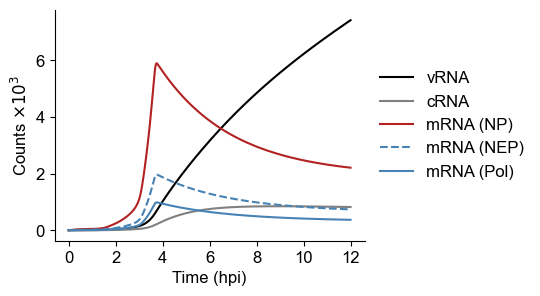

In [4]:
# Plot results
f, ax = plt.subplots(1, 1, figsize=(4,3)) 

#plt.plot(t, sol[:, species['cap']]/1000, label='CAP Pool', color='black', linestyle='--')

observable_vRNA = {'Sv':1, 'Sv_Pol':1, 'Sv_Pol_Np':1, 'Sv_c':1}
tota_vRNA = sum([sol[:, species[k]] for k in observable_vRNA.keys()])

plt.plot(t, tota_vRNA/1000, label='vRNA', color='black') 

observable_cRNA = {'Sc':1, 'Sc_Pol':1, 'Sc_Pol_Np':1, }
tota_cRNA = sum([sol[:, species[k]] for k in observable_cRNA.keys()])
plt.plot(t, tota_cRNA/1000, label='cRNA' , color='grey')


# Observable mRNA
plt.plot(t, sol[:, species['mRNA_NP']]/1000, label='mRNA (NP)', color='firebrick')
plt.plot(t, sol[:, species['mRNA_NEP']]/1000, label='mRNA (NEP)', color='steelblue', linestyle='--')
plt.plot(t, sol[:, species['mRNA_Pol']]/1000, label='mRNA (Pol)', color='steelblue')

sns.despine()

# Legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.xlabel('Time (hpi)')
plt.ylabel('Counts $\\times 10^3$')

# x-axis tick every 2h
plt.xticks(np.arange(0, 13, 2))
# Y-axis ticks every 10 
plt.yticks([0,2,4,6])
# Write model to svg 
plt.savefig('figures/fig1.svg', bbox_inches='tight')

In [5]:
 # Load the data 
import pandas as pd

data = pd.read_csv('./data/MDCK_kinetics.csv', sep=',') 

In [6]:
data.head()

,time_hpi,TPM_1e3,Tupple,Molecule,Segment
0,0.000000,0.492611,0,mRNA,PB2
1,0.000000,0.492611,0,cRNA,PB2
2,0.000000,0.492611,0,vRNA,PB2
3,1.886288,1.335321,1,mRNA,PB2
4,2.006689,0.102559,1,cRNA,PB2


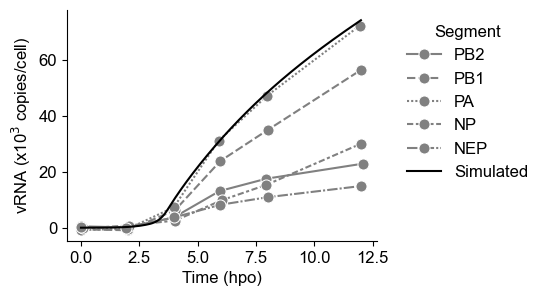

In [7]:
# Make a plot of the vRNA from ol the segments
fig, ax = plt.subplots(figsize=(4,3)) 

rna = data[data['Molecule'] == 'vRNA']
sns.lineplot(data=rna, x='time_hpi', y='TPM_1e3', style='Segment', color='grey',
             #palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],
             ax=ax, legend=True, marker='o', markersize=8)

# Plot the model results for total vRNA
plt.plot(t, tota_vRNA/1000 * 10 , label='Simulated', color='black') 

# Legend outside the plot
ax.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False,)

sns.despine()
ax.set_xlabel('Time (hpo)')
ax.set_ylabel('vRNA (x10$^3$ copies/cell)')

plt.savefig('figures/supplemental_validation_vRNA.svg', bbox_inches='tight')

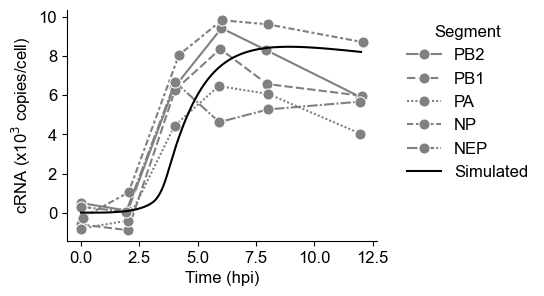

In [8]:
# Make a plot of the vRNA from ol the segments
fig, ax = plt.subplots(figsize=(4,3)) 

rna = data[data['Molecule'] == 'cRNA']
sns.lineplot(data=rna, x='time_hpi', y='TPM_1e3', style='Segment', color='grey',
             #palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],
             ax=ax, legend=True, marker='o', markersize=8)

# Plot the model results for total vRNA
plt.plot(t, tota_cRNA/1000 * 10 , label='Simulated', color='black') 

# Legend outside the plot
ax.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False,)

sns.despine()
ax.set_xlabel('Time (hpi)')
ax.set_ylabel('cRNA (x10$^3$ copies/cell)')

plt.savefig('figures/supplemental_validation_cRNA.svg', bbox_inches='tight')

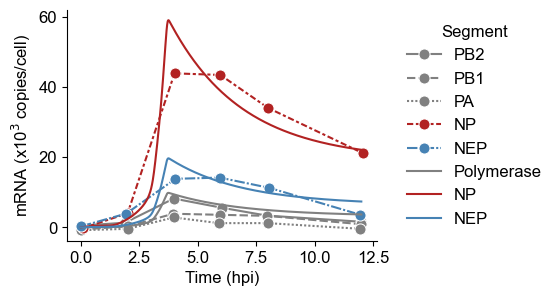

In [9]:
# Make a plot of the vRNA from ol the segments
fig, ax = plt.subplots(figsize=(4,3)) 

rna = data[data['Molecule'] == 'mRNA']
sns.lineplot(data=rna, x='time_hpi', y='TPM_1e3' ,hue='Segment', style='Segment',
             palette=['grey','grey', 'grey', 'firebrick', 'steelblue'],
             ax=ax, legend=True, marker='o', markersize=8)

# Plot the model results for total vRNA
plt.plot(t, sol[:, species['mRNA_Pol']]/1000 * 10 ,  label='Polymerase', color='grey') 
plt.plot(t, sol[:, species['mRNA_NP']]/1000 * 10 ,  label='NP', color='firebrick') 
plt.plot(t, sol[:, species['mRNA_NEP']]/1000 * 10 ,  label='NEP', color='steelblue') 

# Legend outside the plot
ax.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False,)

sns.despine()
ax.set_xlabel('Time (hpi)')
ax.set_ylabel('mRNA (x10$^3$ copies/cell)')

plt.savefig('figures/supplemental_validation_mRNA.svg', bbox_inches='tight')

In [10]:
# Modulate the 